# Ensemble

- 여러 모형을 결합하여 성능을 더 높이는 기술
- voting, bagging, boosting 등의 방법이 있음

# Voting 

- 여러 가지 분류기를 사용하여 성능을 향상시키는 것
    - ex) knn + svm + tree
    
## 형태
### hard voting
- 다수결의 원칙
    - 즉 다양한 분류기가 가장 많이 선정한 class를 선택  
    
### soft voting
- 확률적 다수결
    - 즉 다양한 분류기가 각 class에 해당할 확률을 계산하고 이를 평균하여 선택
      
        
- 일반적으로 soft가 많이 사용된다고 함

# Bagging

- 같은 알고리즘으로 여러개의 분류기를 만들어 최종 voting함
- 대표적으로 RF(random forest) 알고리즘이 있음(단순 bagging과 엄밀히 따지면 다른 점이 있지만 넘어가도록 하자)
- 자료를 분할할 때 m개의 임의 자료를 사용하여 적합함
    - 일반적으로 m = sqrt(p)
    - 자료를 임의의 m개를 사용하는 것은 clf간 correlated를 막기 위함

- parameters: tree기반이므로 유사한 특징들은 상속함
    - n_estimators: 결정 트리 갯수(default=10)
    - max_features: tree와 같음(default=sqrt)
    - max_depth: tree와 같음
    - min_samples_leaf: tree와 같음
    

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings(action='ignore')

data = pd.read_csv('../1.clustering/titanic.csv')

target = data['Survived']
data = data.drop(['PassengerId', 'Survived'], axis=1)

def sex(a):
    if a == 'male':
        return 0
    else:
        return 1
    
def emb(a):
    if a == 'S':
        return 0
    elif a == 'Q':
        return 1
    else:
        return 2
    
data['Sex'] = data['Sex'].map(sex)
data['Embarked'] = data['Embarked'].map(emb)

train_X, test_X, train_y, test_y = train_test_split(data, target, test_size=0.3, random_state=2019, shuffle=True)

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

lr = LogisticRegression()
dclf = DecisionTreeClassifier()
knn = KNeighborsClassifier(n_neighbors=3)

In [3]:
from sklearn.ensemble import VotingClassifier

vclf = VotingClassifier(estimators=[
    ('lr', lr),
    ('knn', knn),
    ('tree', dclf)
], voting='soft').fit(train_X, train_y)

In [4]:
pred_y = vclf.predict(test_X)
print(accuracy_score(test_y, pred_y))

0.7616822429906542


In [5]:
from sklearn.ensemble import VotingClassifier

vclf = VotingClassifier(estimators=[
    ('lr', lr),
    ('knn', knn),
    ('tree', dclf)
], voting='hard').fit(train_X, train_y)
pred_y = vclf.predict(test_X)
print(accuracy_score(test_y, pred_y))

0.7850467289719626


In [6]:
## 개별 모형이 절대적으로 낮은 수준을 보여주는 것은 아님
## 개인적인의견으로 정확도와는 별개로 모형이 더 robust해지는 듯한 느낌은 받았음
print('lr: ', accuracy_score(test_y, lr.fit(train_X, train_y).predict(test_X)))
print('knn: ', accuracy_score(test_y, knn.fit(train_X, train_y).predict(test_X)))
print('tree: ', accuracy_score(test_y, dclf.fit(train_X, train_y).predict(test_X)))

lr:  0.7990654205607477
knn:  0.6915887850467289
tree:  0.6962616822429907


In [7]:
############ Bagging ##################

In [8]:
from sklearn.ensemble import RandomForestClassifier

rclf = RandomForestClassifier(random_state=2019, max_depth=9).fit(train_X, train_y)

print(accuracy_score(test_y, rclf.predict(test_X)))

0.7897196261682243


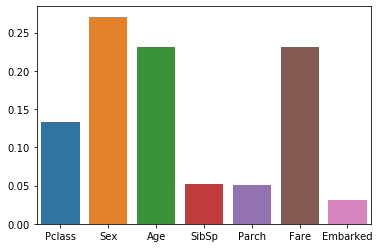

In [9]:
import seaborn as sns

sns.barplot(x=train_X.columns, y=rclf.feature_importances_)

In [10]:
#### voting을 다시 포함 시키는 것도 가능

In [11]:
from sklearn.ensemble import VotingClassifier

vclf = VotingClassifier(estimators=[
    ('lr', lr),
    ('knn', knn),
    ('tree', dclf),
    ('rf', rclf)
], voting='hard').fit(train_X, train_y)
pred_y = vclf.predict(test_X)
print(accuracy_score(test_y, pred_y))

0.7990654205607477
